### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 


In [38]:
#importamos librerias 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

In [39]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [40]:
train_images[0].shape #3 dimensions

(32, 32, 3)

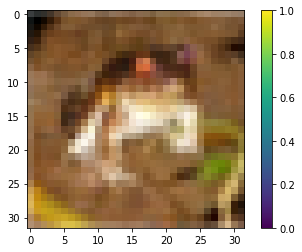

In [41]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()  #IMAGEN 32 X 32 RGB

In [42]:
print("Training labels:",len(train_labels))
print("Training images:",len(train_images))
print("Test labels:",len(test_labels))
print("Test images:",len(test_images))


Training labels: 50000
Training images: 50000
Test labels: 10000
Test images: 10000


In [43]:
train_images.shape 

(50000, 32, 32, 3)

In [44]:
# transform to 2D
from skimage.color import rgb2gray

# transform 3D images to 2D
train_images = rgb2gray(train_images)
train_images.shape

(50000, 32, 32)

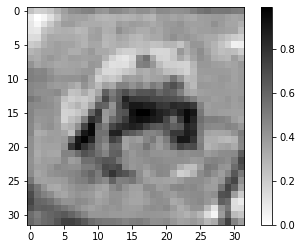

In [45]:
#cheking figure 2D

plt.figure()
plt.imshow(train_images[0], cmap= plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show() 

# 1


1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [46]:

model = keras.Sequential([
    keras.layers.Conv2D(8, (3, 3), padding="same", input_shape=(32, 32, 1),activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                65568     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 65,978
Trainable params: 65,978
Non-trainable params: 0
__________________________________________________

In [47]:
#compile

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
import numpy as np 
test_images = rgb2gray(test_images) 
test_images = np.expand_dims(test_images, axis=-1) 

test_images.shape

(10000, 32, 32, 1)

In [49]:
train_images = np.expand_dims(train_images, axis=-1) 
print(train_images.shape)

(50000, 32, 32, 1)


In [50]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8137 - accuracy: 0.3560
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5635 - accuracy: 0.4532
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4707 - accuracy: 0.4880
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4193 - accuracy: 0.5049
Epoch 5/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3841 - accuracy: 0.5139
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3534 - accuracy: 0.5263
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3330 - accuracy: 0.5306
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3158 - accuracy: 0.5383
Epoch 9/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3055 - accuracy: 0.5435
Epoch 10/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.296

In [54]:
#Evaluate

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.3147 - accuracy: 0.5444

Test accuracy: 0.5443999767303467


# 2

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [56]:
model_2 = keras.Sequential([
    keras.layers.Conv2D(8, (3, 3), padding="valid", input_shape=(32, 32, 1),activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                28816     
_________________________________________________________________
dense_9 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [57]:
#compile

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
model_2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8378 - accuracy: 0.3232
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6122 - accuracy: 0.4212
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5292 - accuracy: 0.4565
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4705 - accuracy: 0.4781
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4197 - accuracy: 0.4981
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3791 - accuracy: 0.5131
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3508 - accuracy: 0.5236
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3237 - accuracy: 0.5355
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3154 - accuracy: 0.5383
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.293

In [59]:
#Evaluate

test_loss_2, test_acc_2 = model_2.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc_2)

313/313 - 1s - loss: 1.2919 - accuracy: 0.5471

Test accuracy: 0.5471000075340271


### Best result?



In [62]:
print('The resulte the first model have present a Test accuracy:', test_acc, 'front the sencond model with a result Test accuracy:', test_acc_2, 'we can show that the diference is not much between each other')

The resulte the first model have present a Test accuracy: 0.5443999767303467 front the sencond model with a result Test accuracy: 0.5471000075340271 we can show that the diference is not much between each other


### Entrena la red neuronal 1 pero esta vez con las imágenes a color.

In [63]:
# Third Model

(train_images_3, train_labels_3), (test_images_3, test_labels_3) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images_3, test_images_3 = train_images_3 / 255.0, test_images_3 / 255.0

In [66]:
model_3 = keras.Sequential([
    keras.layers.Conv2D(8, (3, 3), padding="valid", input_shape=(32, 32, 3),activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                28816     
_________________________________________________________________
dense_12 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [67]:
#compile

model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [68]:
model_3.fit(train_images_3, train_labels_3, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7701 - accuracy: 0.3416
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4962 - accuracy: 0.4558
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4048 - accuracy: 0.4945
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3509 - accuracy: 0.5170
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3229 - accuracy: 0.5275
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2999 - accuracy: 0.5347
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2845 - accuracy: 0.5414
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2670 - accuracy: 0.5457
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2511 - accuracy: 0.5520
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.238

In [70]:
#Evaluate

test_loss_3, test_acc_3 = model_3.evaluate(test_images_3,  test_labels_3, verbose=2)

print('\nTest accuracy:', test_acc_3)

313/313 - 1s - loss: 1.2008 - accuracy: 0.5712

Test accuracy: 0.5712000131607056


#### Conclusion

The result are some better in 3D with accuracy: 0.57